# Aviation Airplane Safety Analysis


## Business Problem
This project takes a look at the Aviation Accident Dataset which contains data about civil aviation accidents and incidents in the United States and its territories, and international waters. Using this dataset, I identify patterns in accidents that result in the most damage to the aircraft and its passengers to help the Aviation company determine aircrafts that present lower risks for the company.

## Data Understanding

The Aviation Accident Database contains aviation accident data from 1962-2023 with each accident is given a unique ID that displays all the accident and aircraft data associated with that unique ID (e.g. weather, aircraft model, etc.)

In [2]:
#Importing pandas and numpy python modules
import pandas as pd
import numpy as np

In [3]:
#Reading the contents of Aviation_Data.csv and saving it to the aviation variable
aviation = pd.read_csv('./data/Aviation_Data.csv')

/var/folders/tr/25_dhxdn761_fdmhsy7p1r9r0000gn/T/ipykernel_39190/1875587756.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation = pd.read_csv('./data/Aviation_Data.csv')


We can get a more detailed view of the dataset by using **info** function

In [4]:
#Displaying all columns and their corresponding data type
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

This dataframe contains 31 columns with 90348 entries. The varying values in each row means that there's missing data that we will have to deal with. Most columns have an object datatype, but five columns are a numerical datatype (Number.of.Engines, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured)

In [5]:
#Descriptive statistics for the numerical columns
aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Descriptive statistics for the columns with a numerical datatype. The Total.Fatal.Injuries and Total.Uninjured columns have a very high standard deviation compared to the rest of the columns, so it will be something we have to take into consideration when working with those columns

In [18]:
#Check for missing values
aviation.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

We can see that there's tons of missing values in each column. Some columns such as Schedule, Air.carrier, an others have much more missing values then others. We will have to deal with these missing values by cleaning the dataset.

In [6]:
#Displaying first 5 rows of aviation dataset
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#### In the next few cells, I use the value_counts() function to display the number of different values in each column

In [20]:
aviation['Total.Fatal.Injuries'].value_counts()

Total.Fatal.Injuries
0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
156.0        1
68.0         1
31.0         1
115.0        1
176.0        1
Name: count, Length: 125, dtype: int64

In this column, we most of our values are within the 1-5 range with the a large majority of the values being 0

In [21]:
aviation['Weather.Condition'].value_counts()

Weather.Condition
VMC    77303
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64

The weather condition column has four values. VMC is almost 80% of the data in this column, IMC is the other weather condition with almost 6000 data points. The last two values UNK and Unk are unknown values which we will have to specify when working with this particular column

In [22]:
aviation['Engine.Type'].value_counts()

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

The Reciprocating engine type is by far the most common, with the Turbo engines following it. There are also a few engines with under 15 occurences, something we should take into consideration when analyzing the data in this column.

In [23]:
aviation['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

Relatively dispersed set of values compared to the other columns, with most accidents happening in the Landing, Takeoff, and Cruise stages of flight.

In [25]:
aviation['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

Looks like a lot of the same values are under different names. We will have to fix the values in the column to maintain the validity of the dataset.

In [27]:
#Converting Event.Date column to a datetime data type
aviation['Event.Date'] = pd.to_datetime(aviation['Event.Date'])
aviation.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

Here, I changed the Event.Date column to a datetime datatype in case we wanted to manipulate that column in the future.

## Data Preparation

### Data Cleaning

#### Dropping columns

First, I'm going the make the columns more easily accessible by changing the format of the column name. We also have a lot of columns that won't help us make our business recommendations, so I will drop those unnecessary columns.

In [28]:
#Making eaach column name lower case and replacing the period with an underscore Event.ID --> event_id

aviation.columns = aviation.columns = aviation.columns.str.lower().str.replace('.', '_')
aviation.drop(columns = ['latitude', 'longitude', 'airport_code', 'airport_name', 'purpose_of_flight', 'publication_date', 'registration_number'], inplace = True)
aviation.head()

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,...,far_description,schedule,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,NaN,NaN,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,NaN,NaN,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,NaN,NaN,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,NaN,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [29]:
#Checking for the NaN values in the aviation dataset
aviation.isna().sum()

event_id                   1459
investigation_type            0
accident_number            1459
event_date                 1459
location                   1511
country                    1685
injury_severity            2459
aircraft_damage            4653
aircraft_category         58061
make                       1522
model                      1551
amateur_built              1561
number_of_engines          7543
engine_type                8555
far_description           58325
schedule                  77766
air_carrier               73700
total_fatal_injuries      12860
total_serious_injuries    13969
total_minor_injuries      13392
total_uninjured            7371
weather_condition          5951
broad_phase_of_flight     28624
report_status              7843
dtype: int64

After checking for the missing data, I realized we can drop the **aircraft_category**, **far_description**, **schedule**, and **air_carrier** columns which all have more missing data than actual data

In [30]:
#Dropping columns with tons of missing data and displaying first five rows of the dataset
aviation.drop(columns = ['aircraft_category', 'far_description', 'schedule', 'air_carrier'], inplace = True)
aviation.head()

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


#### Check for duplicates

In [31]:
#Creating a duplicates table to check how many duplicates there are in the dataset
duplicates = aviation[aviation.duplicated()]
print(len(duplicates))
duplicates.head()

1392


,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
64050,NaN,25-09-2020,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Removing all duplicates except the first occurence
aviation.drop_duplicates(inplace=True)

In [33]:
#Making sure we removed all the duplicates
duplicates = aviation[aviation.duplicated()]
print(len(duplicates))
duplicates.head()

0


,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status


In [34]:
#Displaying all the rows where event_id has missing values
aviation[aviation['event_id'].isna()]

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
64030,NaN,25-09-2020,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69843,NaN,14-06-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74420,NaN,03-11-2020,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74946,NaN,24-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75894,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89440,NaN,02-12-2022,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89492,NaN,05-08-2022,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89763,NaN,08-12-2022,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89943,NaN,15-12-2022,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the cell above, we can see that all the rows where event_id is NaN only contains missing values, so I will go ahead and drop all those rows

In [35]:
#Dropping all the rows where the column event_id contains missing values
aviation.dropna(subset=['event_id'], inplace = True)
aviation.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
injury_severity             999
aircraft_damage            3193
make                         63
model                        92
amateur_built               102
number_of_engines          6083
engine_type                7094
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4491
broad_phase_of_flight     27163
report_status              6382
dtype: int64

In [36]:
#Checking the values in the make column
aviation['make'].value_counts()


make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

As we can see from the cell above, **CESSNA** and **PIPER** are seperate values from **Cessna** and **Piper** (we can also assume it's the same case for other values in this column), so we need to fix this data entry issue to make it so that they are the same category

In [37]:
#Have to first drop NaN values to apply lambda function
#Using lambda function to update all values in row with the capitalize function
aviation.dropna(subset=['make'], inplace = True)
aviation['make'] = aviation['make'] = aviation['make'].apply(lambda x: x.capitalize())

In [38]:
#Checking to see if we have the correct data
aviation['make'].value_counts()

make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2743
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse ralph l        1
Name: count, Length: 7587, dtype: int64

Filling in NaN values in the **report_status** column with most frequent report status

In [39]:
aviation['report_status'].fillna(value='Probable Cause', inplace = True)
aviation['report_status'].value_counts()
aviation['report_status'].isna().sum()

0

Filling in NaN values in **weather_condition** column with **'Missing'** value, and adding the 'UNK' and 'Unk' values to the 'Missing' category

In [40]:
aviation['weather_condition'].fillna(value='Missing', inplace = True)
aviation['weather_condition'] = aviation['weather_condition'].replace('UNK', 'Missing')
aviation['weather_condition'] = aviation['weather_condition'].replace('Unk', 'Missing')
aviation['weather_condition'].value_counts()

weather_condition
VMC        77281
IMC         5973
Missing     5570
Name: count, dtype: int64

Filling in NaN values in **broad_phase_of_flight** column with 'Missing' value, and adding 'Unknown' values to 'Missing' category

In [41]:
aviation['broad_phase_of_flight'].fillna(value='Missing', inplace = True)
aviation['broad_phase_of_flight'] = aviation['broad_phase_of_flight'].replace('Unknown', 'Missing')
aviation['broad_phase_of_flight'].value_counts()

broad_phase_of_flight
Missing        27659
Landing        15427
Takeoff        12490
Cruise         10267
Maneuvering     8143
Approach        6543
Climb           2034
Taxi            1958
Descent         1886
Go-around       1353
Standing         945
Other            119
Name: count, dtype: int64

In [42]:
#Displaying all rows where injury severity is NaN
aviation[aviation['injury_severity'].isna()]

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
63918,20080111X00038,Incident,DCA08WA024,2008-01-03,"Deauville Saint, France",France,NaN,Minor,Boeing,737-400,No,NaN,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
63962,20080204X00132,Accident,NYC08WA081,2008-01-16,"Kiteni, Peru",Peru,NaN,Substantial,Bell,212,No,NaN,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
63987,20080304X00254,Incident,ENG08RA015,2008-01-24,"Kingston, Jamaica",Jamaica,NaN,NaN,Cessna,C208B Caravan,No,NaN,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
64026,20081219X65255,Incident,ENG08WA014,2008-02-03,"Nurnberg, Germany",Germany,NaN,NaN,Boeing,737,No,2.0,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
64131,20080409X00444,Accident,NYC08WA121,2008-02-28,"Lago Ranco, Chile",Chile,NaN,Substantial,Piper,PA-34-200,No,NaN,NaN,0.0,0.0,0.0,0.0,VMC,Missing,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90322,20221213106449,Accident,GAA22WA311,2022-12-11,"Kildare,",Ireland,NaN,Destroyed,Robinson helicopter company,R44 II,No,1.0,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
90333,20221215106462,Accident,CEN23LA064,2022-12-15,"Patterson, LA",United States,NaN,NaN,Bell,206-L4,No,NaN,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
90338,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,Airbus,A330-243,No,NaN,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,Missing,Missing,Probable Cause


Looks like the rows with NaN values for injury severity have no injury data, so I'm going to drop those rows

In [43]:
#Dropping all rows where the injury_severity column is NaN
aviation.dropna(subset=['injury_severity'], inplace = True)
aviation['injury_severity'].isna().sum()

0

Filling in the NaN values with "Missing" value and adding "Unknown" values to that category for the rest of the categorical columns

In [44]:
#Checking to see the different values in the aircraft_damage column
aviation['aircraft_damage'].value_counts()

aircraft_damage
Substantial    63942
Destroyed      18550
Minor           2579
Unknown           92
Name: count, dtype: int64

In [45]:
#Replacing all the NaN values with a "Missing" value and also adding Unknown values to that column
aviation['aircraft_damage'].fillna(value="Missing", inplace = True)
aviation['aircraft_damage'] = aviation['aircraft_damage'].replace('Unknown', 'Missing')
aviation['aircraft_damage'].value_counts()


aircraft_damage
Substantial    63942
Destroyed      18550
Missing         2771
Minor           2579
Name: count, dtype: int64

In [47]:
#Replacing all NaN values and Unknown values with a "Missing" value in the engine_type column
aviation['engine_type'].fillna(value="Missing", inplace = True)
aviation['engine_type'] = aviation['engine_type'].replace('Unknown', 'Missing')
aviation['engine_type'] = aviation['engine_type'].replace('UNK', 'Missing')
aviation['engine_type'] = aviation['engine_type'].replace('NONE', 'Missing')
aviation['engine_type'].value_counts()


engine_type
Reciprocating      69492
Missing             8306
Turbo Shaft         3602
Turbo Prop          3372
Turbo Fan           2360
Turbo Jet            698
Electric               8
LR                     2
Hybrid Rocket          1
Geared Turbofan        1
Name: count, dtype: int64

In [48]:
#Displaying all rows where number_of_engines is NaN
aviation[aviation['number_of_engines'].isna()]

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,Missing,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
3600,20001214X42040,Accident,LAX83LA093,1983-01-01,"ARROYO GRANDE, CA",United States,Non-Fatal,Missing,Piccard,AX-6,No,NaN,Missing,0.0,1.0,0.0,1.0,VMC,Landing,Probable Cause
3741,20001214X42020,Accident,LAX83FUG14,1983-01-22,"NORTH SHORE, CA",United States,Non-Fatal,Substantial,Schweizer,2-33A,No,NaN,Missing,0.0,1.0,0.0,0.0,VMC,Takeoff,Probable Cause
3772,20001214X41990,Accident,FTW83FA102,1983-01-29,"HEMPSTEAD, TX",United States,Fatal(1),Destroyed,Schweizer,SGS 1-26B,No,NaN,Missing,1.0,0.0,0.0,0.0,VMC,Approach,Probable Cause
3870,20001214X42203,Accident,FTW83LA112,1983-02-12,"LITTLEFIELD, TX",United States,Non-Fatal,Substantial,Pratt-read,PRG-1,No,NaN,Missing,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90340,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,Minor,Missing,Cessna,172F,No,NaN,Missing,0.0,1.0,0.0,0.0,Missing,Missing,Probable Cause
90341,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,Minor,Missing,Grumman american avn. corp.,AA-5B,No,NaN,Missing,0.0,1.0,0.0,1.0,Missing,Missing,Probable Cause
90342,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,Fatal,Missing,Air tractor,AT502,No,NaN,Missing,1.0,0.0,0.0,0.0,Missing,Missing,Probable Cause
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Missing,Piper,PA-28-151,No,NaN,Missing,0.0,1.0,0.0,0.0,Missing,Missing,Probable Cause


After further analysis of the data, the rows in which number of engines has NaN values also has missing values in the engine type along with a few missing values in the **aircraft_damage**, **weather_condition**, and **broad_phase_of_flight** columns. Although it's usually inadvisable to drop this many rows, these rows have tons of missing data and shouldn't affect our the validity of our dataset as a whole

In [49]:
#Due to tons of missing data, dropping all the rows where number_of_engines is NaN
aviation.dropna(subset=['number_of_engines'], inplace = True)
aviation.isna().sum()


event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     23
country                     218
injury_severity               0
aircraft_damage               0
make                          0
model                        36
amateur_built                20
number_of_engines             0
engine_type                   0
total_fatal_injuries      10611
total_serious_injuries    11394
total_minor_injuries      10747
total_uninjured            5053
weather_condition             0
broad_phase_of_flight         0
report_status                 0
dtype: int64

Cleaned up most of the missing values, now for the continuous columns **total_fatal_injuries**, **total_serious_injuries**, **total_minor_injuries**, and **total_uninjured** I will fill those values with the most common occurence

In [50]:
#Replacing the missing values in the injury columns with 0
aviation['total_fatal_injuries'].fillna(value=0.0, inplace = True)
aviation['total_serious_injuries'].fillna(value=0.0, inplace = True)
aviation['total_minor_injuries'].fillna(value=0.0, inplace = True)
aviation['total_uninjured'].fillna(value=0.0, inplace = True)
aviation.isna().sum()

event_id                    0
investigation_type          0
accident_number             0
event_date                  0
location                   23
country                   218
injury_severity             0
aircraft_damage             0
make                        0
model                      36
amateur_built              20
number_of_engines           0
engine_type                 0
total_fatal_injuries        0
total_serious_injuries      0
total_minor_injuries        0
total_uninjured             0
weather_condition           0
broad_phase_of_flight       0
report_status               0
dtype: int64

In [51]:
#Displaying all rows where country is NaN
aviation[aviation['country'].isna()]

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
36,20020917X02410,Accident,MIA82FKA05,1982-01-04,SAINT CROIX,NaN,Fatal(1),Destroyed,Cessna,206,No,1.0,Reciprocating,1.0,0.0,1.0,0.0,VMC,Taxi,Probable Cause
464,20020917X02358,Accident,MIA82DA062,1982-03-02,HUMA CAO,NaN,Fatal(1),Destroyed,Cessna,150,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,VMC,Descent,Probable Cause
465,20020917X02026,Accident,FTW82DA076,1982-03-02,MUSTANG BLK A11,NaN,Non-Fatal,Missing,Bell,12,No,2.0,Turbo Shaft,0.0,1.0,0.0,5.0,VMC,Standing,Probable Cause
725,20020917X02377,Accident,MIA82DA091,1982-03-31,MOCA,NaN,Non-Fatal,Substantial,Piper,PA-32R,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,Missing,Landing,Probable Cause
831,20020917X02069,Accident,FTW82DA127,1982-04-13,WEST DELTA 105D,NaN,Non-Fatal,Destroyed,Bell,206B,No,1.0,Turbo Shaft,0.0,0.0,1.0,0.0,VMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48268,20001212X20824,Accident,FTW00LA137,2000-04-29,SALT MARSH,NaN,Non-Fatal,Substantial,Bell,206L3,No,1.0,Turbo Shaft,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause
48800,20001212X21530,Accident,MIA00FA208,2000-07-08,VIEQUES,NaN,Fatal(1),Destroyed,Cessna,402C,No,2.0,Reciprocating,1.0,0.0,0.0,0.0,VMC,Descent,Probable Cause
49292,20001212X21973,Accident,FTW00LA252,2000-09-07,EUGENE IS 296B,NaN,Non-Fatal,Substantial,Bell,206-L1,No,1.0,Turbo Shaft,0.0,1.0,0.0,0.0,VMC,Approach,Probable Cause
51557,20011015X02088,Accident,MIA02FAMS1,2001-10-01,Unknown,NaN,Fatal(1),Destroyed,Ayres,S2RHG-T65,No,1.0,Turbo Prop,1.0,0.0,0.0,0.0,VMC,Missing,Probable Cause


In [52]:
#Filling in missing values for country column
aviation['country'].fillna(value="Int/US Territory", inplace = True)


In [53]:
#Filling in missing values with most common occurence
aviation['amateur_built'].fillna(value='No', inplace = True)

Since theres only a few observations with missing values, it shouldn't be too consequential to the dataset if I drop these rows

In [54]:
#Dropping remaining missing values
aviation.dropna(subset=['location'], inplace = True)
aviation.dropna(subset=['model'], inplace = True)
aviation.isna().sum()

event_id                  0
investigation_type        0
accident_number           0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
report_status             0
dtype: int64

### Feature Engineering

Creating a **total_injuries** column to display the total amount of injuries from each accident

In [55]:
#Creating total_injuries column by concatenating each injury column
aviation['total_injuries'] = (aviation['total_fatal_injuries']+aviation['total_serious_injuries']+aviation['total_minor_injuries'])

Creating a **month** column to display the month of each incident

In [56]:
#Extracting the month from the event_date column using a datetime method
aviation['month'] = aviation['event_date'].dt.month

In [57]:
#Checking to see if new columns were added
aviation.head()

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,make,model,...,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,total_injuries,month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,...,Reciprocating,2.0,0.0,0.0,0.0,Missing,Cruise,Probable Cause,2.0,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,...,Reciprocating,4.0,0.0,0.0,0.0,Missing,Missing,Probable Cause,4.0,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,...,Reciprocating,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,3.0,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,...,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2.0,6
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell douglas,DC9,...,Turbo Fan,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,1.0,9


In [58]:
aviation.to_csv('./data/cleaned_aviation.csv')

## Data Analysis

In [59]:
#Importing the neccessary libraries for data analysis
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

### Top 20 unsafe aircrafts
First, we are going to take a look at which aircrafts have the most average number of deaths per flight. However, some of these aircrafts are on this list due to not having a high number of occurences.

Text(0, 0.5, 'Average Number of Deaths')

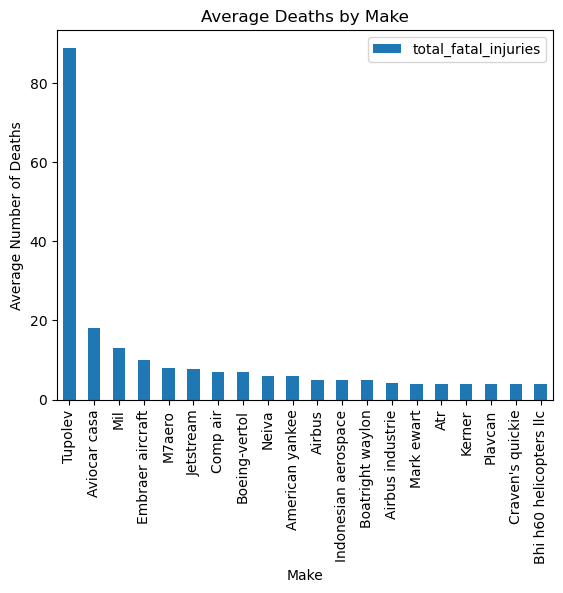

In [69]:
#Creating a pivot table that uses *make* as the index and uses the aggregate function sum on the total_fatal_injuries column
make_pivot = pd.pivot_table(aviation, values = 'total_fatal_injuries', index = 'make' , aggfunc = 'mean')
make_pivot = make_pivot.apply(lambda x: x.sort_values(ascending = False).head(20))
#Plotting the make_pivot table
ax = make_pivot.plot(kind = 'bar', title = 'Average Deaths by Make')
ax.set_xlabel('Make')
ax.set_ylabel('Average Number of Deaths')


Although these aircrafts are less frequent in the dataset, the average number of deaths is too high to be considered

### Injury Statistics by Make
Next, I'd like to take a look at the injury severity during these accidents for some of the frequent aircraft makes in the dataset.

Text(0.5, 1.0, 'Injury data by Make')

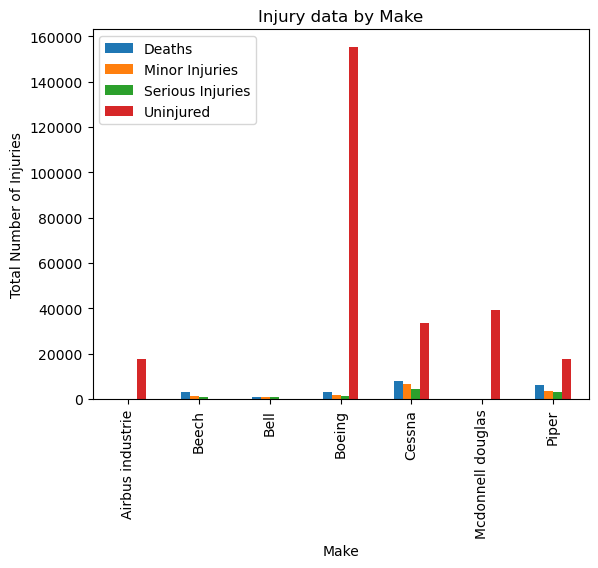

In [70]:
#Creating bar chart that displays all types of injuries by make
make_injury_statistics = pd.pivot_table(aviation, values = ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'], index = 'make', aggfunc = ['sum'])
make_injury_statistics = make_injury_statistics.apply(lambda x: x.sort_values(ascending = False).head(5))
ax = make_injury_statistics.plot(kind = 'bar')
ax.set_xlabel('Make')
ax.set_ylabel('Total Number of Injuries')
ax.legend(['Deaths', 'Minor Injuries', 'Serious Injuries', 'Uninjured'], loc = 'upper left')
ax.set_title("Injury data by Make")

The Boeing aircraft is well above the rest in terms of the number of uninjured people.

### When are these accidents occuring?
Here, I wanted to find out when most deaths were occurring. We can assume that more deaths will occur during travel season, when there's a higher probabilty of an accident occuring.

Text(0.5, 1.0, 'Deaths per Month')

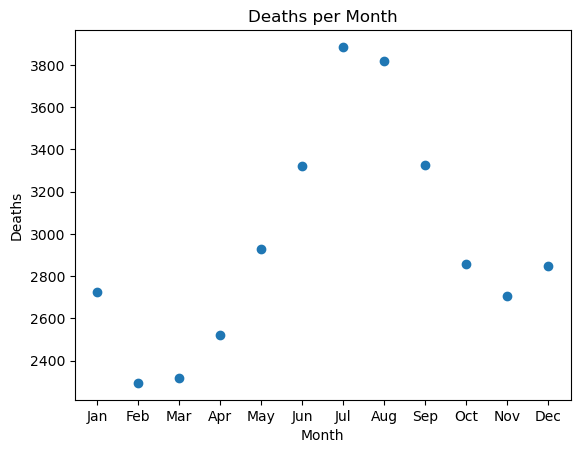

In [62]:
#Creating pivot table that uses month as the index, and uses the sum aggregate function on total_fatal_injuries
date_pivot = pd.pivot_table(aviation, values = ['total_fatal_injuries'], index = 'month', aggfunc = 'sum')
#Creating the subplot
fig, ax = plt.subplots()
#Creating a list of month names to plot on x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Plotting scatter plot
ax.scatter(month_names, date_pivot['total_fatal_injuries'])
ax.set_xlabel('Month')
ax.set_ylabel('Deaths')
ax.set_title('Deaths per Month')

As expected, the number of deaths peak in the summer months. However, the gradual increase shows that temperature is
major factor along with it being travel season

### At what point of the flight due most injuries occur?

Text(0.5, 1.0, 'Average Number of Injuries Per Phase of Flight')

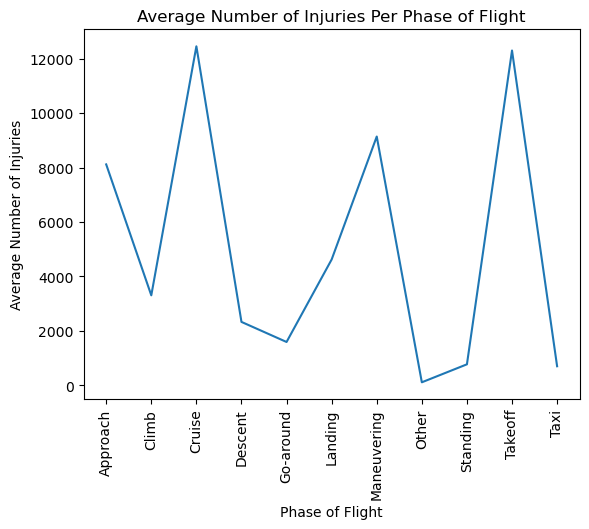

In [63]:
#Creating pivot table that uses phase_of_flight as the index, and uses the sum aggregate function on total_injuries
phase_pivot = pd.pivot_table(aviation, values = ['total_injuries'], index = 'broad_phase_of_flight', aggfunc = 'sum')
#Dropped the missing column as it's not relevant for our visualization
phase_pivot.drop('Missing', inplace = True)
#Creating visualization
fig, ax = plt.subplots()
ax.plot(phase_pivot.index.values, phase_pivot['total_injuries'])
plt.xticks(rotation= 'vertical')
ax.set_xlabel('Phase of Flight')
ax.set_ylabel('Average Number of Injuries')
ax.set_title('Average Number of Injuries Per Phase of Flight')


Most deaths seem to occur when the accident occurs in the Cruise and Takeoff stages of the flight, while it is relatively safer during the descent and standing phases of the flight.

### Which engine type is the safest?

Text(0.5, 1.0, 'Average Number of Deaths by Engine Type')

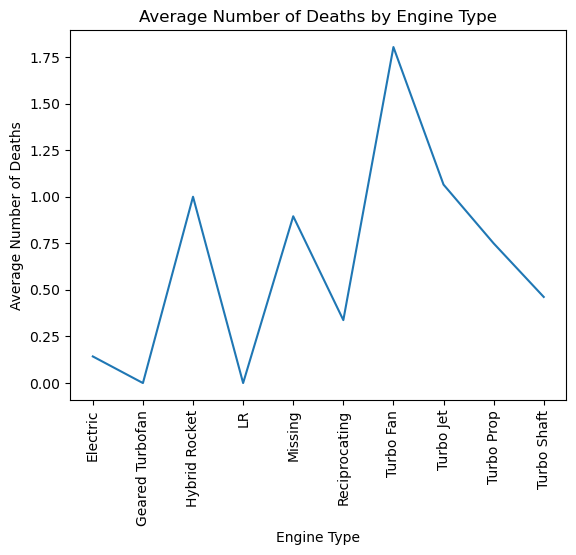

In [64]:
#Creating pivot table that uses engine_type as the index, and uses the mean aggregate function on total_fatal_injuries
engine_pivot = pd.pivot_table(aviation, values = ['total_fatal_injuries'], index = ['engine_type'], aggfunc = 'mean')
#Creating visualization
fig, ax = plt.subplots()
ax.plot(engine_pivot.index.values, engine_pivot['total_fatal_injuries'])
plt.xticks(rotation= 'vertical')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Average Number of Deaths')
ax.set_title('Average Number of Deaths by Engine Type')

We can see that the General Turbofan and LR engines are relatively safer when compared to the Turbo Fan engine which has the highest number of average deaths

## Business Recommendations

After extensive review of the historical aircraft data, our analysis led to three recommendations for the aviation division:


- Fly in the colder months of the year. We can see that a majority of aviation accidents happen in the summer. Gradually starts to rise in April and peaks in July and August. Although some of this could be attributed to more people travelling in the summer, it's could be correlated with the temperature increase causing more changes in air density, engine failures, etc., we can concluded this based of the gradual rise of the accidents as the temperature was increasing rather than a sharp peak in June, July, August.
<br>

- Invest in aircrafts with the Reciprocating engine. The Reciprocating engine has one of the lowest average number of deaths per accident and is the most common engine type. Avoid the aircrafts with Turbo Fan and Hybrid Rocket engines which each average more than 1 death per accident much higher than the other engines, while also not having much data to back it.
<br>

- We recommend purchasing a Boeing aircraft IF cost is not an issue. A Boeing aircraft is always equipped with the safest engine types and has the most extensive data regarding its accidents. In this aviation accident dataset, the Boeing aircraft boasts the most uninjured per flight time and time again. If safety is the primary goal, you can't go wrong with the Boeing aircraft. 



### Next Steps

Two areas to take a look at:

- Purpose of Flight
   - We could take a look to see if the purpose of flight has an effect on any of our main measures.
- Event Date
   - We already saw how the month affects the total amount of death. We could also look how many deaths/injuries were caused each year.


### Limitations
- When looking at the descriptive statistics, two of the columns we used as measures, total_fatal_inuries and total_uninjured, had very high standard deviations meaning the data was very spread out. Something to consider when interpreting the data.

- Some aircrafts had very minimal data to work with causing some data visualizations to be taken without proper context.




